<a href="https://colab.research.google.com/github/KA18202005/ML--Learning/blob/main/Voting_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Voting Classifier**

In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df = df.iloc[:,1:]
df.head()

,sepal width (cm),petal length (cm),petal width (cm),species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df.head()

,sepal width (cm),petal length (cm),petal width (cm),species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


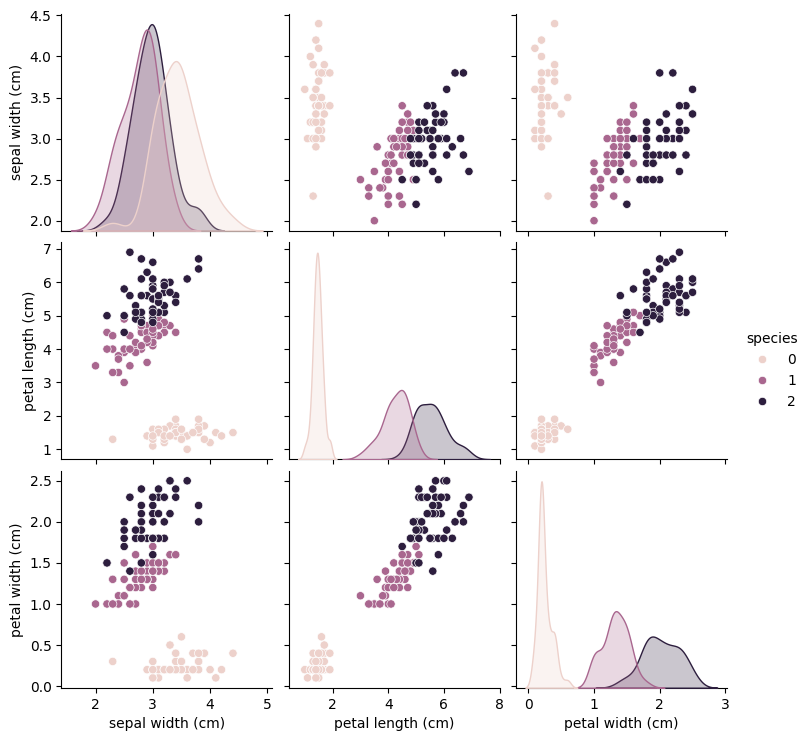

In [8]:
import seaborn as sns
sns.pairplot(df,hue='species')

In [10]:
new_df = df[df['species'] != 0][['sepal width (cm)','species']]
new_df.head()

,sepal width (cm),species
50,3.2,1
51,3.2,1
52,3.1,1
53,2.3,1
54,2.8,1


In [11]:
new_df.shape
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.95
rf 0.95
knn 0.95


In [13]:
from sklearn.ensemble import VotingClassifier

# **Hard Voting**

In [14]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.95


# **Soft Voting**

In [15]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.95


# **Weighted Voting**

In [16]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.95
for i=1,j=1,k=2 0.95
for i=1,j=1,k=3 0.95
for i=1,j=2,k=1 0.95
for i=1,j=2,k=2 0.95
for i=1,j=2,k=3 0.95
for i=1,j=3,k=1 0.95
for i=1,j=3,k=2 0.95
for i=1,j=3,k=3 0.95
for i=2,j=1,k=1 0.95
for i=2,j=1,k=2 0.95
for i=2,j=1,k=3 0.95
for i=2,j=2,k=1 0.95
for i=2,j=2,k=2 0.95
for i=2,j=2,k=3 0.95
for i=2,j=3,k=1 0.95
for i=2,j=3,k=2 0.95
for i=2,j=3,k=3 0.95
for i=3,j=1,k=1 0.95
for i=3,j=1,k=2 0.95
for i=3,j=1,k=3 0.95
for i=3,j=2,k=1 0.95
for i=3,j=2,k=2 0.95
for i=3,j=2,k=3 0.95
for i=3,j=3,k=1 0.95
for i=3,j=3,k=2 0.95
for i=3,j=3,k=3 0.95


# **Classifiers of same Algo**

In [17]:
from sklearn.svm import SVC

In [18]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [19]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
